In [1]:
# all libraries and modules

import pandas
import numpy
import math


In [2]:
# Load the dataset
df = pandas.read_csv(r"C:\Users\DELL\Downloads\tdi dataset.csv") #Load the dataframe

In [3]:
df["Family Size"] = df["sibsp"] + df["parch"] + 1 # Create a family size column to add siblings/spouse amd parent/children
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Family Size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,2
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,2
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1


In [4]:
#Create a new categorical column
bins = [0, 19,45,float('inf')]
labels = ["Teenager", "Youth", "old"]
df["Age Group"] = pandas.cut(df["age"], bins = bins, labels = labels, right = False)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Family Size,Age Group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,Youth
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4,Teenager
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Teenager
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4,Youth
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Youth


In [5]:
#Check for duplicates (Returns 0 if no duplicate was found)
df.duplicated().sum()

0

In [6]:
#Check for number of rows and columns
df.shape

(1309, 16)

In [7]:
#Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1309 non-null   int64   
 1   survived     1309 non-null   int64   
 2   name         1309 non-null   object  
 3   sex          1309 non-null   object  
 4   age          1046 non-null   float64 
 5   sibsp        1309 non-null   int64   
 6   parch        1309 non-null   int64   
 7   ticket       1309 non-null   object  
 8   fare         1308 non-null   float64 
 9   cabin        295 non-null    object  
 10  embarked     1307 non-null   object  
 11  boat         486 non-null    object  
 12  body         121 non-null    float64 
 13  home.dest    745 non-null    object  
 14  Family Size  1309 non-null   int64   
 15  Age Group    1046 non-null   category
dtypes: category(1), float64(3), int64(5), object(7)
memory usage: 154.9+ KB


 # <font color='#ffcocb' size=5>Those not up to 1309 non-null values have null values. Now we replace the null values<font>
    

In [8]:
#Let's fill all null values in age column with the mean of our ages
ageMean = math.floor(df["age"].mean())
df.loc[:, "age"] = df.age.fillna(value=ageMean)


In [9]:
# The fare has only one missing value, we print it out to see how the row looks like
df[df["fare"].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Family Size,Age Group
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,1,old


In [10]:
#We can just drop the record and we will be left with 1308 records
df = df.dropna(subset=["fare"])
df.shape

(1308, 16)

In [11]:
# cabin Has over 1000 null calues, we can replace the null values with not specified
df.loc[:, "cabin"] = df.cabin.fillna(value="Not specified")

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [12]:
'''Since we can't guess correctly passengers port of embarkation and the number of records with unknown port of embarkation is 
    low, we can drop the embarked columns with nul values'''
df = df.dropna(subset=["embarked"])

In [13]:
df.shape

(1306, 16)

In [14]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Family Size,Age Group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,Youth
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4,Teenager
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Teenager
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4,Youth
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Not specified,C,NaN,328.0,NaN,2,Teenager
1305,3,0,"Zabour, Miss. Thamine",female,29.0000,1,0,2665,14.4542,Not specified,C,NaN,NaN,NaN,2,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Not specified,C,NaN,304.0,NaN,1,Youth
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Not specified,C,NaN,NaN,NaN,1,Youth


In [15]:
# We also change null values in boat to not specified
df['boat'] = df["boat"].fillna("Not Specified")

In [16]:
df[:20]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Family Size,Age Group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,Youth
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4,Teenager
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,Not Specified,NaN,"Montreal, PQ / Chesterville, ON",4,Teenager
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,Not Specified,135.0,"Montreal, PQ / Chesterville, ON",4,Youth
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,Not Specified,NaN,"Montreal, PQ / Chesterville, ON",4,Youth
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",1,old
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",2,old
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,Not Specified,NaN,"Belfast, NI",1,Youth
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",3,old
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,Not specified,C,Not Specified,22.0,"Montevideo, Uruguay",1,old


In [17]:
# For body, we assume the body of the passengers with null values are yet to be recovered 
#so we rename all null values to "not recovered"
df.loc[:, "body"] = df.body.fillna("not recovered")

In [18]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Family Size,Age Group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,not recovered,"St Louis, MO",1,Youth
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,not recovered,"Montreal, PQ / Chesterville, ON",4,Teenager
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,Not Specified,not recovered,"Montreal, PQ / Chesterville, ON",4,Teenager
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,Not Specified,135.0,"Montreal, PQ / Chesterville, ON",4,Youth
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,Not Specified,not recovered,"Montreal, PQ / Chesterville, ON",4,Youth


In [47]:
#Let's drop the entire home.dest column as it will not be needed in our analysis
try:
    df = df.drop(columns = ["home.dest"])
except (KeyError):
    pass


In [20]:
# Let's confirm if we have no more duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       1306 non-null   int64   
 1   survived     1306 non-null   int64   
 2   name         1306 non-null   object  
 3   sex          1306 non-null   object  
 4   age          1306 non-null   float64 
 5   sibsp        1306 non-null   int64   
 6   parch        1306 non-null   int64   
 7   ticket       1306 non-null   object  
 8   fare         1306 non-null   float64 
 9   cabin        1306 non-null   object  
 10  embarked     1306 non-null   object  
 11  boat         1306 non-null   object  
 12  body         1306 non-null   object  
 13  Family Size  1306 non-null   int64   
 14  Age Group    1043 non-null   category
dtypes: category(1), float64(2), int64(5), object(7)
memory usage: 154.5+ KB


In [21]:
# We have to update our age group
bins = [0, 19,45,float('inf')]
labels = ["Teenager", "Youth", "old"]
df["Age Group"] = pandas.cut(df["age"], bins = bins, labels = labels, right = False)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,Family Size,Age Group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,not recovered,1,Youth
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,not recovered,4,Teenager
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,Not Specified,not recovered,4,Teenager
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,Not Specified,135.0,4,Youth
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,Not Specified,not recovered,4,Youth


In [22]:
#Let's confirm wether all is fixed
df.dtypes

pclass            int64
survived          int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body             object
Family Size       int64
Age Group      category
dtype: object

 # <font color='#ffcocb' size=5>Now, there are no more null values. Let's work on using the correct data types.<font>
    

In [50]:
#Let's make the name column a string
df = df.astype({
    "name": str,
    "sex": str,
    "age": int,
    "ticket":str
})
df.dtypes

pclass                int64
survived              int64
name                 object
sex                  object
age                   int32
sibsp                 int64
parch                 int64
ticket               object
fare                float64
cabin                string
embarked             string
boat                 string
body                float64
Family Size           int64
Age Group          category
fare per person     float64
dtype: object

In [30]:
#Let's replace the "not recovered" in body to an actual number
# We will be replacing with numpy nan
df["body"] = df["body"].replace("not recovered", numpy.nan)
pandas.Series(df["body"])

0         NaN
1         NaN
2         NaN
3       135.0
4         NaN
        ...  
1304    328.0
1305      NaN
1306    304.0
1307      NaN
1308      NaN
Name: body, Length: 1306, dtype: float64

In [31]:
#We can then convert it to a integer dtype
df["body"] = df["body"].astype(float)
df["body"].dtype

dtype('float64')

In [32]:
#Let's print out the first 20 rows of our data and see the new look
df[0:20]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,Family Size,Age Group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,1,Youth
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,4,Teenager
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,Not Specified,NaN,4,Teenager
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,Not Specified,135.0,4,Youth
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,Not Specified,NaN,4,Youth
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,3,NaN,1,old
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NaN,2,old
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0.0000,A36,S,Not Specified,NaN,1,Youth
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NaN,3,old
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,Not specified,C,Not Specified,22.0,1,old


In [33]:
df["sex"].unique()

<StringArray>
['female', 'male']
Length: 2, dtype: string

 # <font color='#ffcocb' size=5>Let's start getting some informations from our data<font>
    

In [34]:
#Let's find passengers who survived and were in 1st class
firstClassSurvivors = df[(df["survived"] == 1) & (df["pclass"] == 1)]
firstClassSurvivors

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,Family Size,Age Group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,1,Youth
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,4,Teenager
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,3,NaN,1,old
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NaN,2,old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NaN,3,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1,1,"Willard, Miss. Constance",female,21,0,0,113795,26.5500,Not specified,S,8 10,NaN,1,Youth
317,1,1,"Williams, Mr. Richard Norris II",male,21,0,1,PC 17597,61.3792,Not specified,C,A,NaN,2,Youth
319,1,1,"Wilson, Miss. Helen Alice",female,31,0,0,16966,134.5000,E39 E41,C,3,NaN,1,Youth
320,1,1,"Woolner, Mr. Hugh",male,29,0,0,19947,35.5000,C52,S,D,NaN,1,Youth


In [35]:
#Let's find survival rate of each passenger class
survivalRateByPclass = df.groupby("pclass")["survived"].mean() * 100
survivalRateByPclass.round(2).astype(str) + "%"

pclass
1    61.68%
2    42.96%
3    25.56%
Name: survived, dtype: object

<AxesSubplot:title={'center':'survival Rate By Passanger Class'}, xlabel='pclass'>

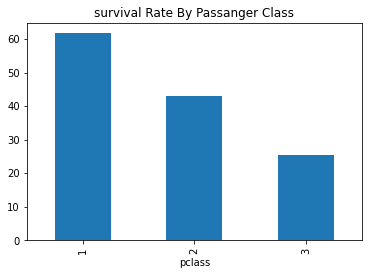

In [36]:
survivalRateByPclass.plot(kind = "bar", title="survival Rate By Passanger Class") #Chart showing the survival rate by class

In [37]:
# Let's create fare per person by dividing fare by the damily Size
df["fare per person"] = df["fare"]/df["Family Size"]
df.shape

(1306, 16)

In [38]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,Family Size,Age Group,fare per person
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,1,Youth,211.3375
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,4,Teenager,37.8875
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,Not Specified,NaN,4,Teenager,37.8875
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,Not Specified,135.0,4,Youth,37.8875
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,Not Specified,NaN,4,Youth,37.8875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,Not specified,C,Not Specified,328.0,2,Teenager,7.2271
1305,3,0,"Zabour, Miss. Thamine",female,29,1,0,2665,14.4542,Not specified,C,Not Specified,NaN,2,Youth,7.2271
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,Not specified,C,Not Specified,304.0,1,Youth,7.2250
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,Not specified,C,Not Specified,NaN,1,Youth,7.2250


In [39]:
#Let's determine the shape of those that survived
survived = df[(df["survived"] == 1)]
survived.shape

(498, 16)

In [40]:
#Let's determine the shape of those that did not survive
survived = df[(df["survived"] == 0)]
survived.shape

(808, 16)

 # <font color='#ffcocb' size=5>Here, I'll export the dataframe as csv and use in another jupyter notebook to create visualization.<font>
    

In [41]:
#Reconfirm there's no null value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pclass           1306 non-null   int64   
 1   survived         1306 non-null   int64   
 2   name             1306 non-null   string  
 3   sex              1306 non-null   string  
 4   age              1306 non-null   int32   
 5   sibsp            1306 non-null   int64   
 6   parch            1306 non-null   int64   
 7   ticket           1306 non-null   string  
 8   fare             1306 non-null   float64 
 9   cabin            1306 non-null   string  
 10  embarked         1306 non-null   string  
 11  boat             1306 non-null   string  
 12  body             120 non-null    float64 
 13  Family Size      1306 non-null   int64   
 14  Age Group        1306 non-null   category
 15  fare per person  1306 non-null   float64 
dtypes: category(1), float64(3), int32(1), int6

In [42]:
#Check the total rows and columns to confirm that's accurate
df.shape

(1306, 16)

In [43]:
#Confirm if all datatypes are set correctly
df.dtypes

pclass                int64
survived              int64
name                 string
sex                  string
age                   int32
sibsp                 int64
parch                 int64
ticket               string
fare                float64
cabin                string
embarked             string
boat                 string
body                float64
Family Size           int64
Age Group          category
fare per person     float64
dtype: object

In [44]:
#Now export the file
df.to_csv('cleanedDf.csv')